**Setup Environment**

In [ ]:
!pip install langchain_community replicate pandas


**Import Libraries and Setup IBM Granite (Replicate API)**

In [20]:
from langchain_community.llms import Replicate
from google.colab import userdata
import os


api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token


model_name = "ibm-granite/granite-3.3-8b-instruct"
llm = Replicate(model=model_name, replicate_api_token=api_token)

print("IBM Granite model connected successfully!")


IBM Granite model connected successfully!


**Upload and Read Dataset Robot Execution Failures**

In [21]:
import glob

all_data = ""
for file_name in glob.glob("*.data"):
    with open(file_name, "r") as f:
        all_data += f.read() + "\n"

print(all_data[:800])


normal
	-2	-1	81	0	-5	0
	-2	-1	79	0	-4	0
	-2	-1	79	0	-4	0
	-2	-1	80	0	-4	0
	-3	-1	79	1	-5	1
	-2	-1	81	0	-5	0
	-2	-1	80	0	-4	0
	-2	-1	79	0	-4	0
	-2	-1	79	0	-4	0
	-2	-1	79	0	-4	0
	-2	-1	80	1	-4	0
	-1	-1	80	0	-4	1
	-2	-1	78	0	-5	0
	-3	-1	80	1	-4	1
	-2	-1	79	0	-4	0


normal
	6	-1	79	-2	4	-3
	42	-3	80	5	53	3
	-5	4	74	-15	-10	-1
	-4	-17	93	26	-6	-3
	2	1	74	-6	-3	-4
	0	-5	78	3	-6	0
	-3	-7	83	8	-5	-3
	-6	2	71	-12	-11	1
	-3	3	76	-6	-9	-4
	-2	-9	86	16	-8	-2
	-4	2	77	-5	-7	2
	2	-3	81	7	1	9
	-1	-5	80	6	-6	0
	-4	5	78	-14	-9	-4
	-4	1	80	-3	-12	5


normal
	-2	-6	85	14	-5	2
	0	2	74	-7	1	0
	-4	-5	76	7	-11	4
	-2	-2	78	1	-6	1
	-4	4	76	-18	-13	-10
	-2	4	74	-10	-9	-4
	1	-9	87	13	-2	-10
	-8	3	69	-13	-20	-5
	-1	0	83	-2	-6	-8
	-3	-6	83	6	-14	-5
	-3	8	73	-19	-11	-3
	-6	-1	80	-1	-20	6
	0	-9	87	13	-5	2
	-5	5	67	-17	


**Summarization Using IBM Granite**

noted : I added a little delay because IBM can't handle all the file executions at once.

In [22]:
import time
import glob

for file_name in glob.glob("*.data"):
    with open(file_name, "r") as f:
        content = f.read()

    prompt_summary = f"""
    You are an AI robotics analyst.
    Summarize the robotic data from file '{file_name}' by identifying:
    - Main operational phases
    - Detected anomalies or abnormal readings
    - Possible causes of failures
    - Recommendations

    Robotic Data:
    {content}
    """

    try:
        print(f"\n===================== SUMMARY for {file_name} =====================\n")
        summary_output = llm.invoke(prompt_summary)
        print(summary_output)
    except Exception as e:
        summary_output = f" Error processing {file_name}: {e}"
        print(summary_output)

    # Save any results (both success and error)
    with open(f"summary_{file_name}.txt", "w") as f:
        f.write(summary_output)

    # Delay to be safe from rate limit
    print("\n Waiting 15 seconds before next request...\n")
    time.sleep(15)



===================== SUMMARY for lp2.data =====================

### Summary of Robotic Data from 'lp2.data'

#### Main Operational Phases:
The data provided appears to represent various sensor readings across different axes (x, y, z) and additional parameters (col_front, col_back, col_left, col_right). No explicit operational phases are discernible as the data does not contain timestamps or phase-identifying markers. The data seems to be a collection of static readings rather than a dynamic sequence.

#### Detected Anomalies or Abnormal Readings:
- There are no clear anomalies or abnormal readings in the 'normal' sections, as all values fall within a typical range for sensor data (e.g., integer values between -100 and 130 for most columns).
- The 'back_col' section shows some unusually large positive values (e.g., 421, 44, 84, 103, 100) which might indicate a potential sensor malfunction or calibration issue, but without context, it's hard to definitively classify these as anomalies

**Generate Final Combined IBM Report**

In [23]:
combined_summaries = ""
for summary_file in sorted(glob.glob("summary_*.txt")):
    with open(summary_file, "r") as f:
        combined_summaries += f"\n\n===== {summary_file} =====\n\n"
        combined_summaries += f.read()


final_prompt = f"""
You are an expert robotics analyst.
Combine and analyze all the following summaries (from lp1–lp5)
to produce one cohesive AI-generated report.

The report should have these sections:
1. General Overview
2. Summary of Each Failure Type
3. Common Patterns Across All Files
4. Root Cause Analysis
5. Global Recommendations

Each section must be written clearly and concisely.

Data Summaries:
{combined_summaries}
"""

try:
    print("Generating final AI report using IBM Granite...")
    final_report = llm.invoke(final_prompt)
    print("\n ======= FINAL AI-GENERATED REPORT =======\n")
    print(final_report)
except Exception as e:
    print(f"Error generating final report: {e}")


with open("final_robot_report.txt", "w") as f:
    f.write(final_report)

print("\n Report saved as 'final_robot_report.txt' success")

Generating final AI report using IBM Granite...

 ======= FINAL AI-GENERATED REPORT =======

## Comprehensive AI-Generated Report on Robotic System Failures

### 1. General Overview

This report consolidates analyses from five data logs (lp1-lp5) to identify patterns, root causes, and recommendations for improving the robotic system's performance and reliability. The data logs reveal various operational phases, anomalies, and failure modes, primarily categorized as collisions, obstructions, sensor malfunctions, and control system issues.

### 2. Summary of Each Failure Type

#### lp1.data
- **Failure Type**: Collisions and Obstructions
- **Anomalies**: Unusual spatial coordinates and force readings.
- **Causes**: Environmental factors, sensor limitations, path planning errors, mechanical issues.
- **Recommendations**: Enhance sensor technology, improve path planning algorithms, regular calibration, redundancy, SLAM techniques, collision detection, and training.

#### lp2.data
- **Failu

**Data Visualisation**

 Keyword Frequency per File:


,sensor,error,collision,failure,torque,obstruction,position,calibration
lp1.data,2,0,5,0,0,2,0,1
lp2.data,9,2,0,1,0,0,0,4
lp3.data,3,0,0,0,0,0,2,1
lp4.data,7,0,5,0,0,5,0,2
lp5.data,0,0,5,0,0,0,0,1


<Figure size 1000x600 with 0 Axes>

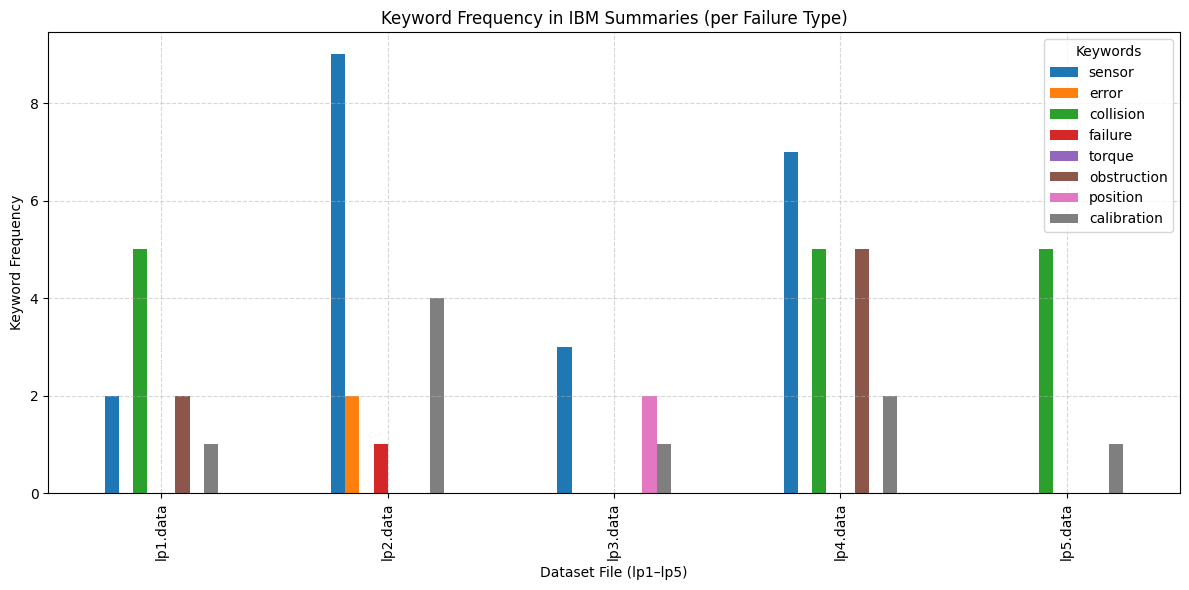

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

summary_files = sorted(glob.glob("summary_*.txt"))
summary_data = {}


keywords = ["sensor", "error", "collision", "failure", "torque", "obstruction", "position", "calibration"]

for file_name in summary_files:
    with open(file_name, "r") as f:
        text = f.read().lower()
        word_count = Counter(re.findall(r'\b\w+\b', text))
        summary_data[file_name] = {kw: word_count[kw] for kw in keywords}


df_summary = pd.DataFrame(summary_data).fillna(0)
df_summary = df_summary.T
df_summary.index = [name.replace("summary_", "").replace(".txt", "") for name in df_summary.index]

print(" Keyword Frequency per File:")
display(df_summary)


plt.figure(figsize=(10, 6))
df_summary.plot(kind='bar', figsize=(12, 6))
plt.title("Keyword Frequency in IBM Summaries (per Failure Type)")
plt.xlabel("Dataset File (lp1–lp5)")
plt.ylabel("Keyword Frequency")
plt.legend(title="Keywords")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

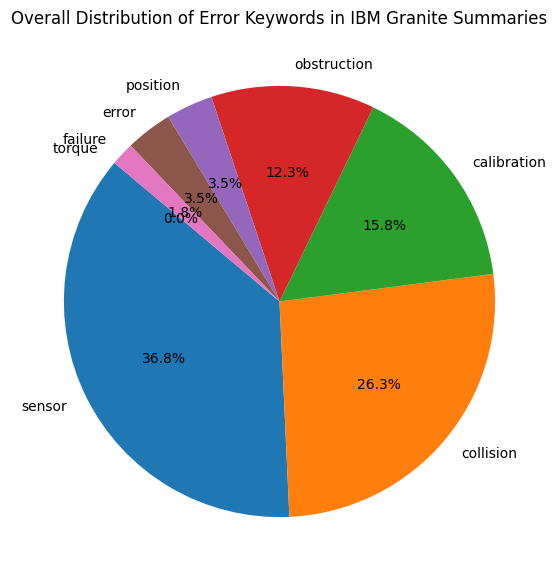

 Insight dari IBM Granite Summaries:
- Dominant issue: sensor (21 occurrences)
- Secondary issue: collision (15 occurrences)
- Least frequent: torque (0 occurrences)


In [25]:
# PIE CHART For overall distribution
total_keywords = df_summary.sum().sort_values(ascending=False)

plt.figure(figsize=(7,7))
plt.pie(total_keywords, labels=total_keywords.index, autopct='%1.1f%%', startangle=140)
plt.title("Overall Distribution of Error Keywords in IBM Granite Summaries")
plt.show()

print(" Insight dari IBM Granite Summaries:")
print(f"- Dominant issue: {total_keywords.index[0]} ({total_keywords.iloc[0]} occurrences)")
print(f"- Secondary issue: {total_keywords.index[1]} ({total_keywords.iloc[1]} occurrences)")
print(f"- Least frequent: {total_keywords.index[-1]} ({total_keywords.iloc[-1]} occurrences)")
